In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import pandas as pd

data = pd.read_csv('../optiver-trading-at-the-close/train.csv')
print(data.shape)
data.dropna(
  subset=[
    'stock_id', 
    'date_id', 
    'seconds_in_bucket', 
    'imbalance_size', 
    'imbalance_buy_sell_flag',
    'reference_price',
    'matched_size',
    'far_price',
    'near_price',
    'bid_price',
    'bid_size',
    'ask_price',
    'ask_size',
    'wap',
    'target',
  ], 
  inplace=True
)
print(data.shape)
data

(2399692, 17)
(1069484, 17)


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5730,0,0,300,0.00,0.0,1.000241,26670118.88,1.000241,1.000241,1.000026,19319.31,1.000241,16149.55,1.000143,-10.039806,30.0,0_300_0
5731,1,0,300,242332.96,-1.0,1.000073,3242054.27,0.981974,0.994490,0.999544,43205.40,1.000308,2042.76,1.000273,-1.329780,30.0,0_300_1
5732,2,0,300,0.00,0.0,1.000193,4671376.00,1.000193,1.000193,0.999035,18971.00,1.001036,59688.26,0.999518,14.009476,30.0,0_300_2
5733,3,0,300,2914730.16,1.0,0.999870,41057776.66,1.003870,1.002279,0.999827,25569.50,1.000042,37897.50,0.999914,-4.339814,30.0,0_300_3
5734,4,0,300,3396923.02,1.0,0.998496,38356174.88,1.007894,1.007894,0.998357,14446.00,0.998703,2601.18,0.998650,10.850430,30.0,0_300_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399686,69,222,330,975476.65,-1.0,0.997204,12209579.27,0.981513,0.991974,0.997204,159765.32,0.998947,198418.44,0.997982,3.999472,12243.0,222_330_69
2399687,70,222,330,1653538.70,1.0,0.997684,2417049.15,1.098045,1.022576,0.997289,7572.00,0.998079,12402.66,0.997588,6.699562,12243.0,222_330_70
2399688,71,222,330,4093350.98,-1.0,0.999158,25868541.48,0.963454,0.974883,0.998893,7047.48,0.999345,7050.67,0.999119,5.259514,12243.0,222_330_71
2399689,72,222,330,0.00,0.0,0.997898,76545780.36,0.997898,0.997898,0.997763,20200.08,0.997898,45307.75,0.997805,-2.260208,12243.0,222_330_72


In [3]:
X = data.drop(['target', 'row_id', 'time_id'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
ols_mae = mean_absolute_error(y_test, y_pred)
print('Linear Regression:', ols_mae)

Linear Regression: 5.867500031610131


/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.38875e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.38875e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.38875e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.38878e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nithin/opt/anacon

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]
[5.867500031617404, 5.867500031681452, 5.867500032321888, 5.867500038726181, 5.867500103066027, 5.867500746743396, 5.867509573350982, 5.867763655447392, 5.876261008852251, 5.927355688864133, 5.955537060959733, 5.958595935802371]


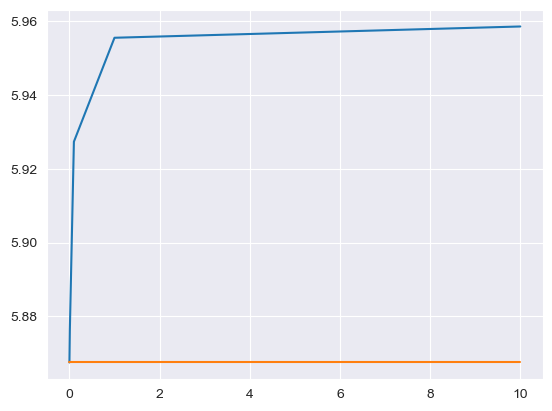

In [5]:
max_alpha = 1
alphas = [10**x for x in range(-10, max_alpha + 1)]
ridge_maes = []
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  ridge_maes.append(mae)
#   print('Ridge Regression:', alpha, mae)
print(alphas)
print(ridge_maes)

import matplotlib.pyplot as plt
plt.plot(alphas, ridge_maes)

# print baseline Linear Regression MAE
plt.plot([0, 10**(max_alpha)], [ols_mae, ols_mae])

/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+07, tolerance: 6.651e+03
  model = cd_fast.enet_coordinate_descent(
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+07, tolerance: 6.651e+03
  model = cd_fast.enet_coordinate_descent(
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

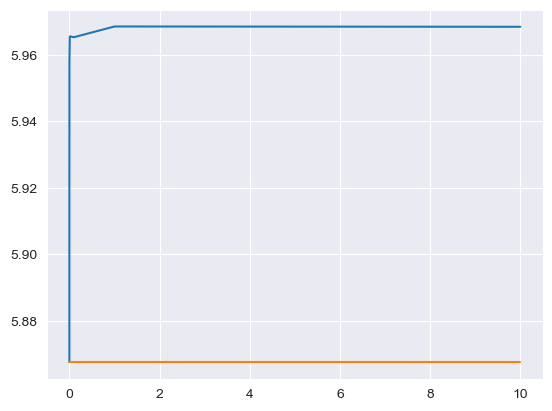

In [6]:
lasso_maes = []
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  lasso_maes.append(mae)

plt.plot(alphas, lasso_maes)
plt.plot([0, 10**(max_alpha)], [ols_mae, ols_mae])

/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+07, tolerance: 6.651e+03
  model = cd_fast.enet_coordinate_descent(
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.211e+07, tolerance: 6.651e+03
  model = cd_fast.enet_coordinate_descent(
/Users/nithin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

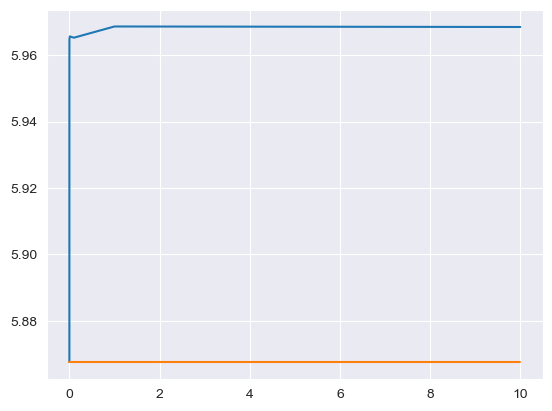

In [7]:
elastic_maes = []
for alpha in alphas:
  elastic = ElasticNet(alpha=alpha)
  elastic.fit(X_train, y_train)
  y_pred = elastic.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  elastic_maes.append(mae)

plt.plot(alphas, elastic_maes)
plt.plot([0, 10**(max_alpha)], [ols_mae, ols_mae])

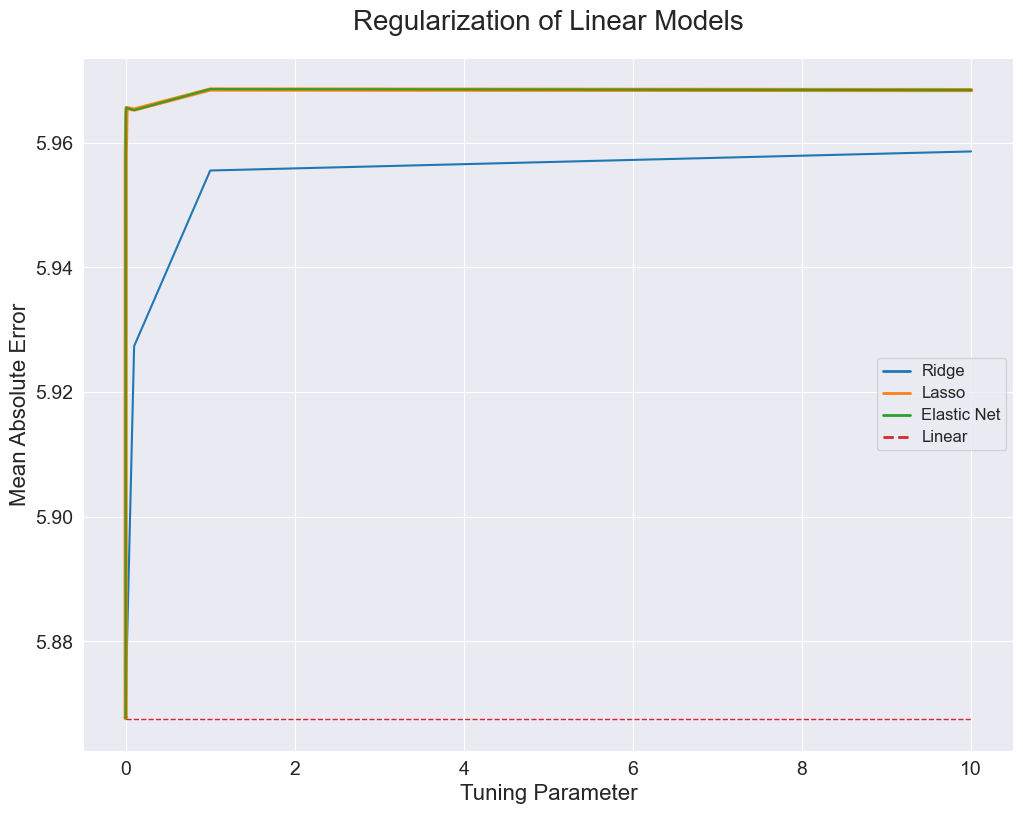

In [13]:
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(12, 9))
plt.plot(alphas, ridge_maes)
plt.plot(alphas, lasso_maes, linewidth=3)
plt.plot(alphas, elastic_maes)
plt.plot([0, 10**(max_alpha)], [ols_mae, ols_mae], linewidth=1, linestyle='--')
plt.xlabel('Tuning Parameter', fontsize=16)
plt.ylabel('Mean Absolute Error', fontsize=16)
plt.title('Regularization of Linear Models', fontsize=20, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(['Ridge', 'Lasso', 'Elastic Net'])
leg = plt.legend(['Ridge', 'Lasso', 'Elastic Net', 'Linear'])
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('large')
plt.show()

In [63]:
all_maes = pd.DataFrame({
    'alpha': alphas,
    'linear': [ols_mae] * len(alphas),
    'ridge': ridge_maes,
    'lasso': lasso_maes,
    'elastic': elastic_maes,
    })
all_maes

,alpha,linear,ridge,lasso,elastic
0,1.000000e-10,5.8675,5.867500,5.867703,5.867696
1,1.000000e-09,5.8675,5.867500,5.867703,5.867670
2,1.000000e-08,5.8675,5.867500,5.867703,5.869743
3,1.000000e-07,5.8675,5.867500,5.867701,5.905576
4,1.000000e-06,5.8675,5.867500,5.867691,5.950252
5,1.000000e-05,5.8675,5.867501,5.868081,5.958289
6,1.000000e-04,5.8675,5.867510,5.915579,5.960186
7,1.000000e-03,5.8675,5.867764,5.958090,5.964712
8,1.000000e-02,5.8675,5.876261,5.965566,5.965606
9,1.000000e-01,5.8675,5.927356,5.965308,5.965222
